# Work
請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
(optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

學習在模型開始前檢查各個環節
是否有 GPU 資源
將前處理轉為函式，統一處理訓練、驗證與測試集
將超參數變數化，易於重複使用函式、模型等

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
## 資料前處理 one hot
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

 mlp 5 層

In [5]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape=5, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.9614 - accuracy: 0.2893 - val_loss: 1.8239 - val_accuracy: 0.3537
Epoch 2/100
50000/50000 [==============================] - 6s 124us/step - loss: 1.7292 - accuracy: 0.3791 - val_loss: 1.6834 - val_accuracy: 0.3979
Epoch 3/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.6322 - accuracy: 0.4178 - val_loss: 1.6141 - val_accuracy: 0.4202
Epoch 4/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.5549 - accuracy: 0.4460 - val_loss: 1.5539 - val_accuracy: 0.4482
Epoch 5/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.5129 - accuracy: 0.4612 - val_loss: 1.5138 - val_accuracy: 0.4609
Epoch 6/100
50000/50000 [==============================] - 7s 130us/step - loss: 1.4737 - accuracy: 0.4730 - val_loss: 1.5039 - val_accuracy: 0.4678
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 125us/step - loss: 0.5656 - accuracy: 0.7978 - val_loss: 1.9409 - val_accuracy: 0.5100
Epoch 56/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.5648 - accuracy: 0.7990 - val_loss: 2.0269 - val_accuracy: 0.5053
Epoch 57/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.5666 - accuracy: 0.7976 - val_loss: 2.0397 - val_accuracy: 0.5097
Epoch 58/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5443 - accuracy: 0.8056 - val_loss: 2.0758 - val_accuracy: 0.5054
Epoch 59/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5339 - accuracy: 0.8094 - val_loss: 2.0947 - val_accuracy: 0.5033
Epoch 60/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5332 - accuracy: 0.8096 - val_loss: 2.0875 - val_accuracy: 0.5046
Epoch 61/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.5079 - accuracy: 0.8204 - val

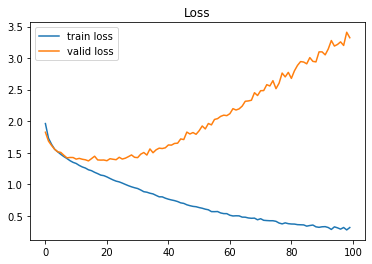

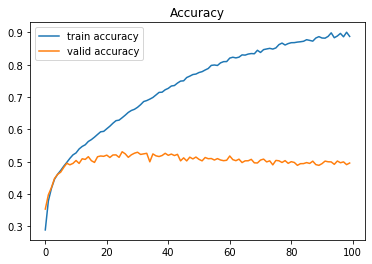

In [11]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

 mlp10 層

In [12]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape=10, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [15]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [16]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.9351 - accuracy: 0.3016 - val_loss: 1.7881 - val_accuracy: 0.3633
Epoch 2/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.7164 - accuracy: 0.3876 - val_loss: 1.6782 - val_accuracy: 0.4000
Epoch 3/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.6245 - accuracy: 0.4201 - val_loss: 1.5867 - val_accuracy: 0.4317
Epoch 4/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.5549 - accuracy: 0.4459 - val_loss: 1.7614 - val_accuracy: 0.3696
Epoch 5/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.5145 - accuracy: 0.4610 - val_loss: 1.5080 - val_accuracy: 0.4592
Epoch 6/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.4612 - accuracy: 0.4805 - val_loss: 1.4975 - val_accuracy: 0.4664
Epoch 7/100
50000/50000 [==============================

50000/50000 [==============================] - 8s 155us/step - loss: 0.6094 - accuracy: 0.7807 - val_loss: 1.8682 - val_accuracy: 0.5130
Epoch 56/100
50000/50000 [==============================] - 8s 150us/step - loss: 0.5900 - accuracy: 0.7887 - val_loss: 1.8622 - val_accuracy: 0.5222
Epoch 57/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5607 - accuracy: 0.8005 - val_loss: 1.9977 - val_accuracy: 0.5077
Epoch 58/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.5663 - accuracy: 0.7971 - val_loss: 2.0619 - val_accuracy: 0.5144
Epoch 59/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.5561 - accuracy: 0.7990 - val_loss: 2.0366 - val_accuracy: 0.5148
Epoch 60/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.5542 - accuracy: 0.8021 - val_loss: 2.0044 - val_accuracy: 0.5186
Epoch 61/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.5438 - accuracy: 0.8063 - val

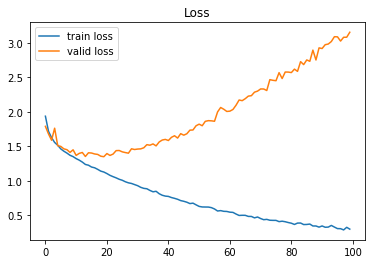

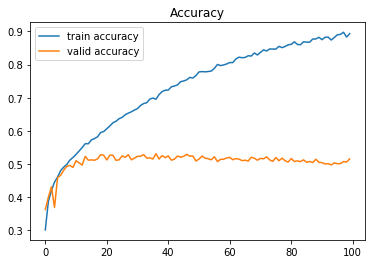

In [17]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Ans:
使用Ａdam演算法比較5層及10層mlp的模型表現發現, 10層mlp適配準確率高於5層(0.5157％>0.4961％),但過擬合現象仍然相當嚴重.
